In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Remove the common warnings due to deprecated options:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [3]:
# Defining a function to easily call definition of terms from the dataset if required later on.
def feat_info(index_name):
    with open('lending_club_info.csv', 'r') as data:
        lc_info = pd.read_csv(data,index_col='LoanStatNew')
        print(lc_info.loc[index_name]['Description'])

In [4]:
# Quick test for the function.
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
df = pd.read_csv('lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
# Checking for nulls - looks like there's null values which will need to be addressed.
df.isnull().any().any()

True

<Axes: xlabel='loan_status', ylabel='count'>

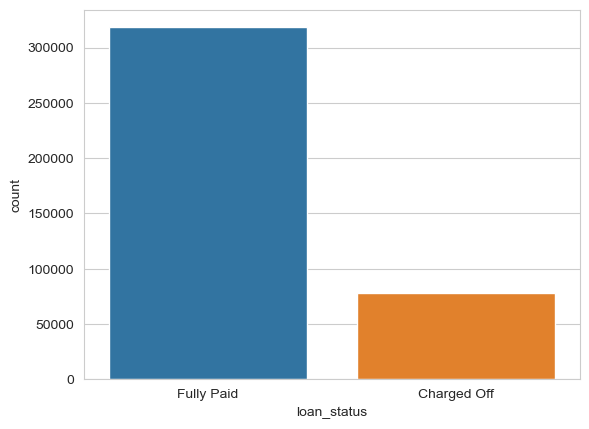

In [9]:
# Checking the balancing of the labels for the classification problem (precision and recall will be key metrics due to a very imbalanced data set).
sns.countplot(x='loan_status',data=df)

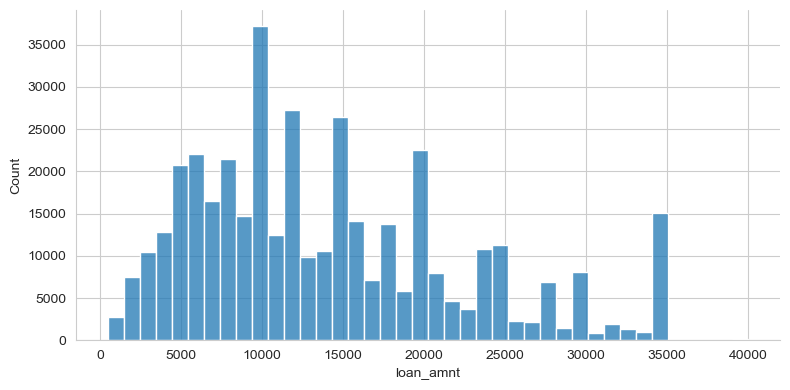

In [10]:
# The spikes seem to be at specific internals (specific loan values)
sns.displot(df['loan_amnt'],bins=40,kde=False,height=4,aspect=2)

In [11]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(12.0, 0.0)

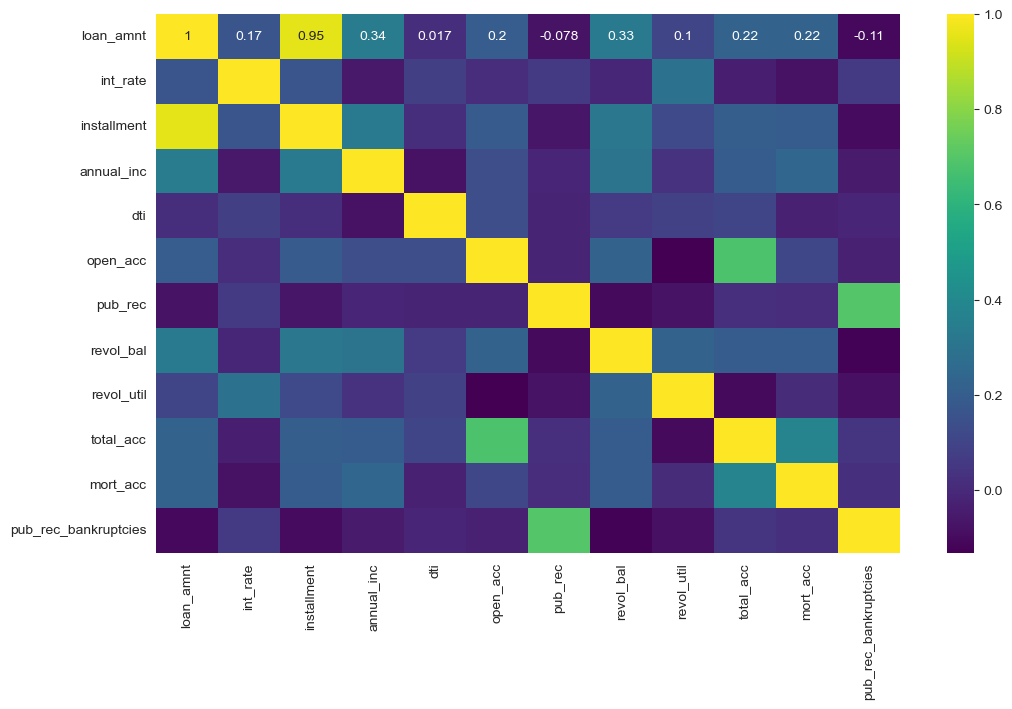

In [12]:
# Installment seems to be highly corellated to loan amount.
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.ylim(12,0)

In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='installment', ylabel='loan_amnt'>

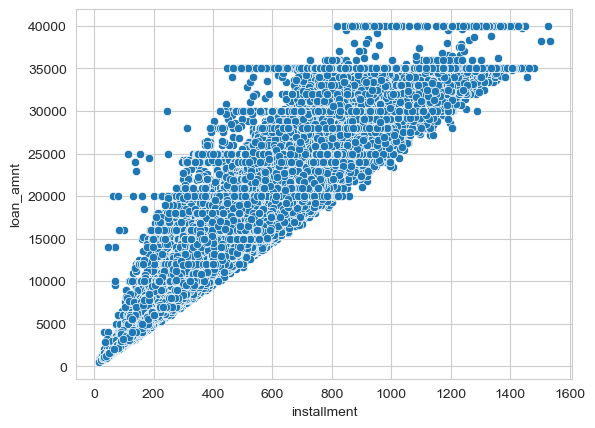

In [15]:
# Seems like there's some kind of direct correlation between the installment and loan amount - obviously a very specific calculation.
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

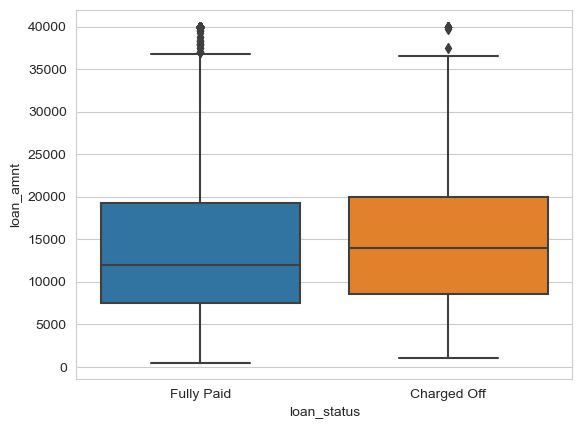

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
# Seems like the average for people unable to completely pay off is slightly higher than people that can.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
# Checking the grade and sub-grade columns
print(df['grade'].unique())
print(df['sub_grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<Axes: xlabel='grade', ylabel='count'>

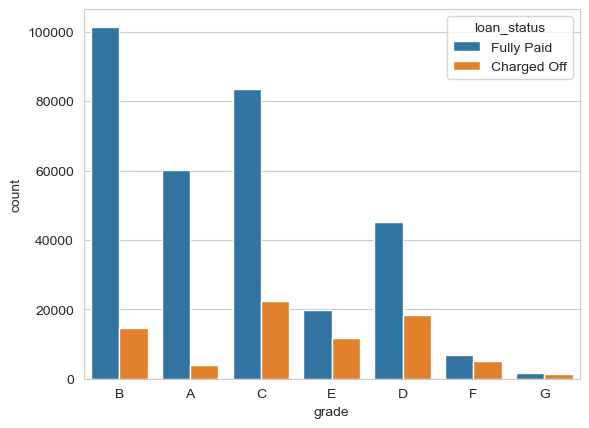

In [19]:
# Checking to see any disparity or pattern exists between grades and loan status.
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

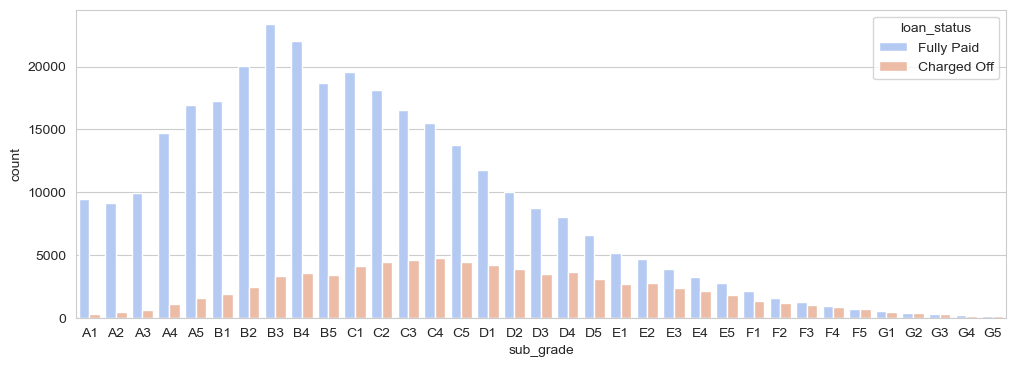

In [20]:
# Seems like F and G grades don't get applied or paid off as often as the others.
plt.figure(figsize=(12,4))
# Sorted the sub-grades by ascending order for easier interpretation of the visualization.
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

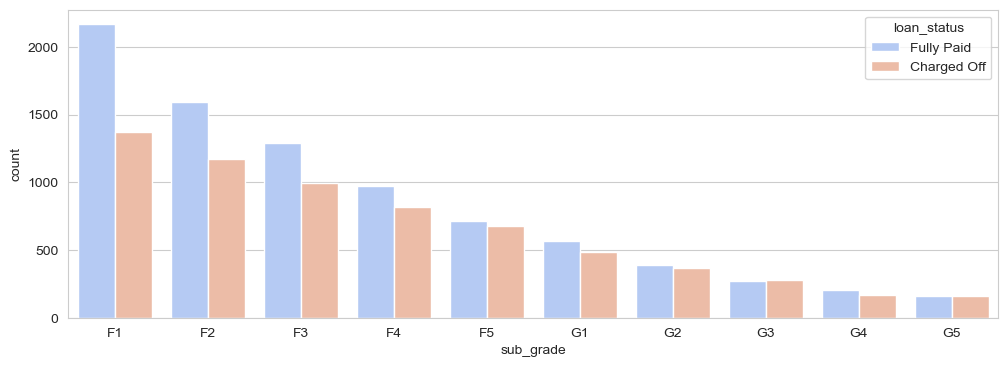

In [21]:
# Checking the distributions for F and G grades specifically.
f_and_g = df[(df['grade']=='G')|(df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

In [22]:
# Creating a new column to denote loan status as a 1 or 0.
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_status','loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


<Axes: >

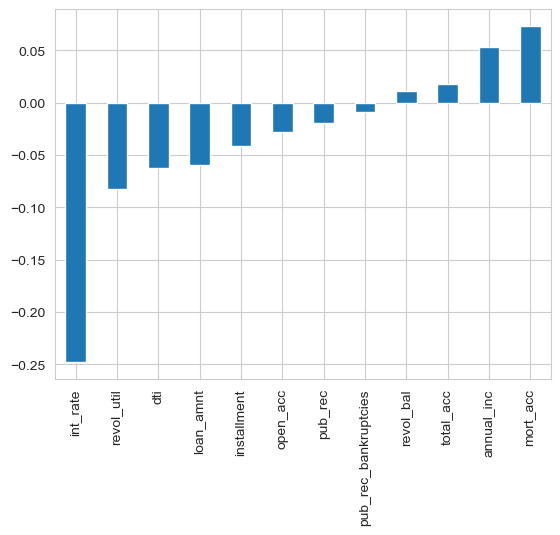

In [23]:
# Seems like interest rate has the highest correlation (negative) when it comes to determining if someone will pay off the loan.
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar') # dropped the loan repaid values as it was perfectly correlated.

In [24]:
# Since there's missing data, checking to see how many are missing and where.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [25]:
# Finding out just what percentage of data is missing before determining what to do with them.
# Seems like a few features are missing a lot of data (eg: mort_acc is missing almost 10%)
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [26]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('mort_acc')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Number of mortgage accounts.


In [27]:
# There's way too many unique titles to make any meaningful use out of them.
df['emp_title'].nunique()

173105

In [28]:
df.drop('emp_title',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394274 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [29]:
# Checking the unique employement length values, excluding na values (since we already know it contains null values)
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [30]:
# Creating an employee list order for analysis purposes
# sorted(df['emp_length'].dropna().unique()) # grabbing the list of years before re-ordering below
emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<Axes: xlabel='emp_length', ylabel='count'>

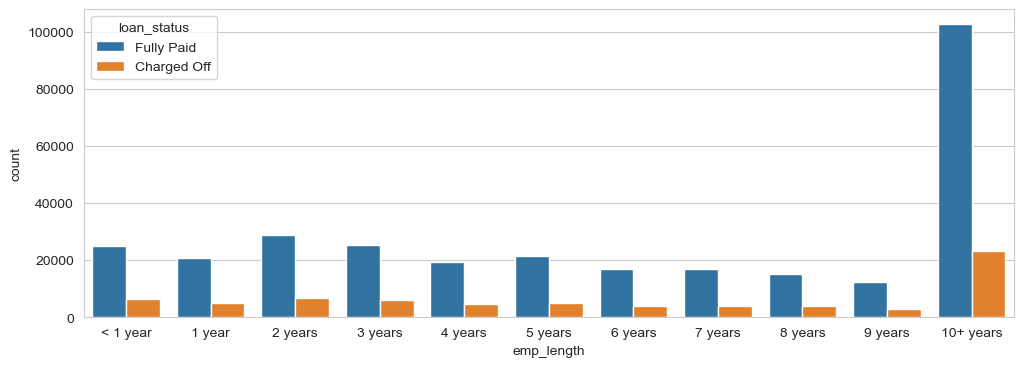

In [31]:
# Makes sense that most people with 10+ years have the loans since they would need a job to pay it back.
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length,hue='loan_status')

In [32]:
# Finding out how many people are charged off per employment length
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [33]:
# Finding out how many people are paid off per employment length
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [34]:
# Checking to see if there's any significant difference between the employment length - based on the results, it seems not
emp_len = emp_co/(emp_co+emp_fp)
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

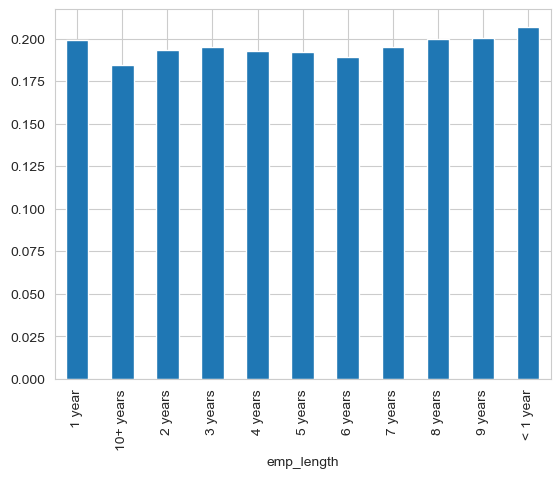

In [35]:
emp_len.plot(kind='bar')

In [36]:
# Decided to drop the employee length feature as it seems like it has the same effect across the board.
df.drop('emp_length',axis=1,inplace=True)
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
feat_info('title')

The loan title provided by the borrower


In [38]:
# Seems like it's just a string based on what the borrower states as a title for the loan.
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [39]:
# Verifying the number of unique values of title before determining to drop it.
df['title'].nunique()

48816

In [40]:
df.drop('title',axis=1,inplace=True)
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [41]:
feat_info('mort_acc')

Number of mortgage accounts.


In [42]:
# Checking the unique value counts across the data set for mortgage accounts.
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [43]:
# Checking to see if there's a strong correlation with another feature - seems like total account is strongly correlated.
df.corr(numeric_only=True)['mort_acc'].sort_values().drop('mort_acc')

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

In [44]:
# Checking for the average mortgage account per set of total account.
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [45]:
# Decided to fill in the null mortgage account values using the average based on total accounts
# Defining a function to take in the 2 pieces of information in order to return the appropriate result
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc): # Checking to see if the mortgage account value is null or not
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [46]:
# Applying the above function to the data set to rectify the null value problem
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [47]:
# Checking to see if the mortgage account issue was addressed or not
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [48]:
# Removing the remaining null values; as they are a really small fraction of the data set, decided to drop them completely.
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [49]:
# Checking to see which columns contain non-numeric (categorical) values:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [51]:
# Seems to be a binary column
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [52]:
# Decided to change the categorical column into a numerical column
df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [53]:
# Decided to drop the grade feature as it's already included as part of sub_grade
df.drop('grade',axis=1,inplace=True)

In [54]:
# Acquiring dummies, while avoiding perfect correlation
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# Concatenating the dummies values with the existing data frame and removing the sub_grade column
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [56]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [57]:
# Seems like a good candidate for dummy variables due to small set of unique values
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [58]:
# Seems like a good candidate for dummy variables due to rather small set of unique values
df['purpose'].value_counts()

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

In [59]:
# Seems like a good candidate for dummy variables due to small set of unique values
df['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [60]:
# Seems like a good candidate for dummy variables due to small set of unique values
df['application_type'].value_counts()

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [61]:
# Decided to use dummy variables for verification status, purpose, initial list status, and application type features as they seem to be good candidates for it
dummies = pd.get_dummies(df[['verification_status','purpose','initial_list_status','application_type']],drop_first=True)
df = pd.concat([df.drop(['verification_status','purpose','initial_list_status','application_type'],axis=1),dummies],axis=1)

In [62]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_J

In [63]:
# 3 categories (other, none, and any) are much to small to be kept on their own - so, going to combine them
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [64]:
# Consolidated none and any into other.
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [65]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [66]:
# Creating dummy variables for home ownership feature
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'O

In [68]:
# Checking the formatting and unique addresses
df['address'].value_counts()

address
USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: count, Length: 392898, dtype: int64

In [69]:
# Decided to extract zipcodes from the address data to see if any further feature engineering can be done
df['zip_code'] = df['address'].apply(lambda address: address[-5:])
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [70]:
# Seems like there aren't too many zip codes; so, can probably make dummy variable for them
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [71]:
# Created dummy variable for zip codes and removed the zip codes and address columns
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop(['zip_code','address'],axis=1),dummies],axis=1)

In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
      

In [73]:
feat_info('issue_d')

The month which the loan was funded


In [74]:
# Based on the feature description, it doesn't make sense to utilize the issue date in the model since we will be using the model to determine the issuance in the first place.
df['issue_d'].value_counts()

issue_d
Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: count, Length: 112, dtype: int64

In [75]:
# Decided to drop the feature as it is data leakage since this is not something we would have information on prior to running the model.
df.drop('issue_d',axis=1,inplace=True)

In [76]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [77]:
# Might be a good feature to evaluate to see how the years building credit affects results.
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [78]:
# Changed the data to only contain the year.
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [79]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Decided to drop the loan status column as it is a duplicate of the feature engineered loan repaid column.
df.drop('loan_status',axis=1,inplace=True)

In [82]:
# Setting feature and label variables.
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [83]:
# Train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
# Scaling the training data using training information.
X_train = scaler.fit_transform(X_train)

In [87]:
# Scaling the test data using training information.
X_test = scaler.transform(X_test)

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
# Checking to see how many features there are in the training data set.
X_train.shape

(316175, 78)

In [90]:
model = Sequential()

model.add(Dense(78,activation='relu')) # Using the number of features for the first neural network with rectified linear units
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid')) # Since it's a binary problem, decided to use sigmoid function

model.compile(optimizer='adam',loss='binary_crossentropy') # Using binary crossentropy since it is a binary classification problem

In [91]:
# Fitting the model in batches due to the extremely large data set and using validation data in order to run checks against the test data set on the side
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3557 - val_loss: 0.2652
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2673 - val_loss: 0.2630
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2622 - val_loss: 0.2619
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2620 - val_loss: 0.2622
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2605 - val_loss: 0.2621
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2614 - val_loss: 0.2617
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2597 - val_loss: 0.2618
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2582 - val_loss: 0.2614
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2592 - val_loss: 0.2612
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2574 - val_loss: 0.2614
Epoch 12/25
1236/1236 ━━━━━━━━

In [93]:
# Saving the model in case I decide to use it later
model.save('LendingClub_v1.keras')

In [95]:
from tensorflow.keras.models import load_model
# model_2 = load_model('LendingClub_v1.keras')

In [99]:
# Evaluating the losses on the model.
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.299288,0.265188
1,0.265893,0.263026
2,0.262630,0.261946
3,0.261414,0.262156
4,0.260695,0.262069


<Axes: >

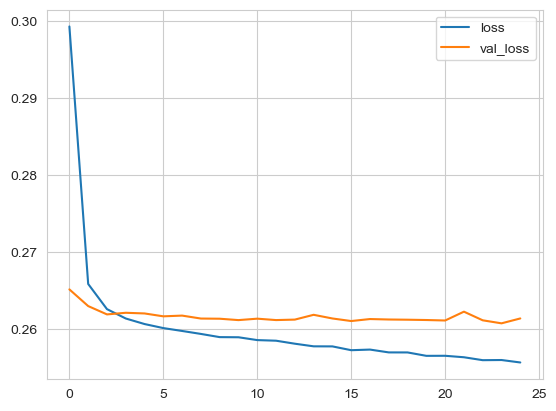

In [100]:
# Based on the results - maybe adding in an early stopping callback and training using higher epochs might be worth trying to see a difference
losses.plot()

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 614us/step


In [104]:
# While evaluating this, the focus is more on the "0" as it's the lower represented classification (imbalanced data set where more is paid off than not)
# f1-score can be improved to improve our model accuracy due to the imbalanced data set as recall is not good for "0"
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [105]:
# Too many of the "0" values are getting misclassified it seems.
print(confusion_matrix(y_test,predictions))

[[ 6788  8870]
 [   55 63331]]
